<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 185.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 187.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 121.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 131.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 89.0 MB/s eta 0:00:00


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


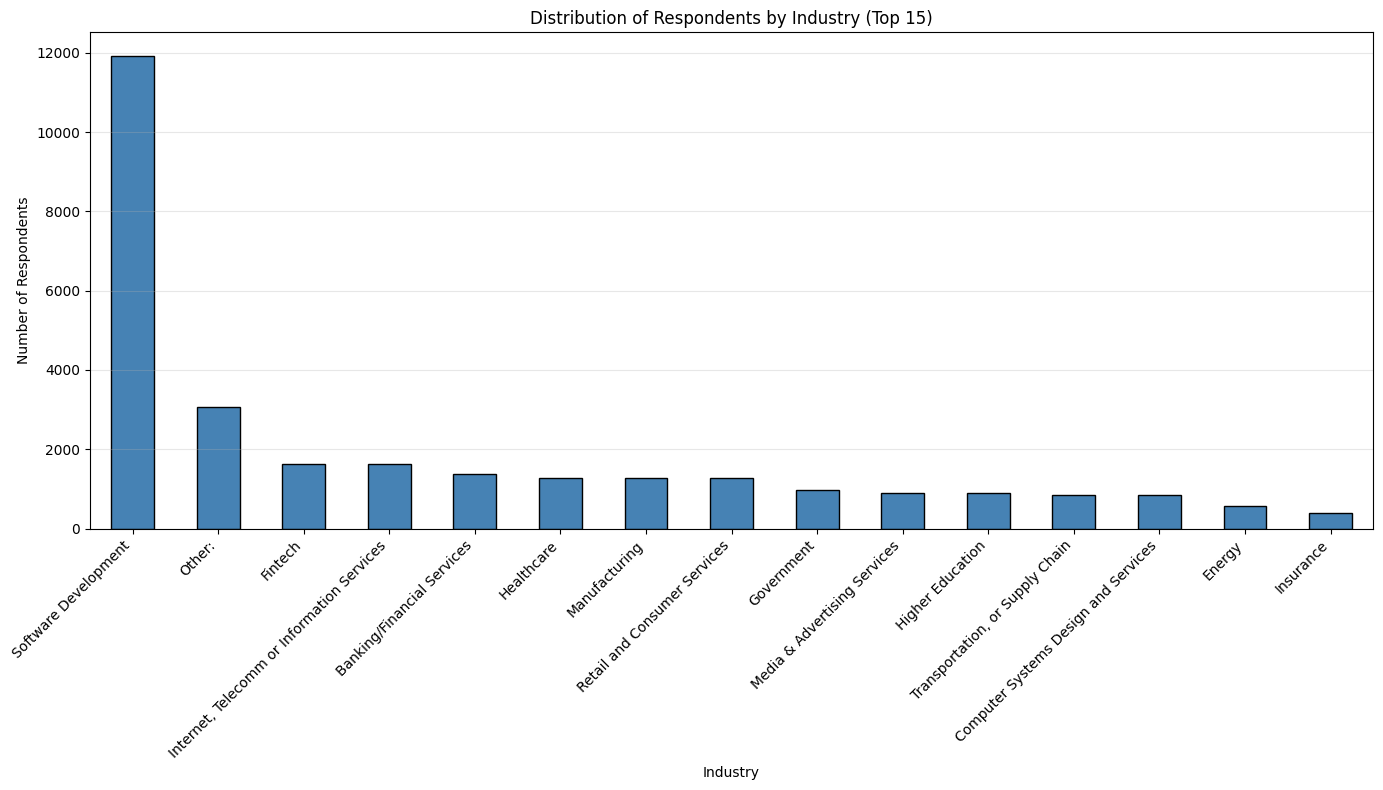


Industry Distribution:
Industry
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Higher Education                                890
Transportation, or Supply Chain                 859
Computer Systems Design and Services            844
Energy                                          578
Insurance                                       389
Name: count, dtype: int64


Notable Trends:
- Most common industry: Software Development (11918 respondents)
- Total unique industries: 15
- Top 3 industries represent 25.42% of responden

In [3]:
# Explore how respondents are distributed across different industries
if 'Industry' in df.columns:
    # Plot a bar chart to visualize the distribution of respondents by industry
    plt.figure(figsize=(14, 8))
    industry_counts = df['Industry'].value_counts().head(15)  # Top 15 industries
    industry_counts.plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title('Distribution of Respondents by Industry (Top 15)')
    plt.xlabel('Industry')
    plt.ylabel('Number of Respondents')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\nIndustry Distribution:")
    print(industry_counts)
    
    print("\n" + "="*60 + "\n")
    
    # Highlight notable trends
    print("Notable Trends:")
    print(f"- Most common industry: {industry_counts.index[0]} ({industry_counts.iloc[0]} respondents)")
    print(f"- Total unique industries: {df['Industry'].nunique()}")
    print(f"- Top 3 industries represent {(industry_counts.head(3).sum() / len(df) * 100):.2f}% of respondents")

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
# Identify respondents with extremely high yearly compensation
if 'ConvertedCompYearly' in df.columns:
    # Ensure the column is numeric
    df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
    
    # Remove NaN values
    comp_data = df['ConvertedCompYearly'].dropna()
    
    # Calculate basic statistics
    mean_comp = comp_data.mean()
    median_comp = comp_data.median()
    std_comp = comp_data.std()
    
    print("Compensation Statistics:")
    print("="*60)
    print(f"Mean: ${mean_comp:,.2f}")
    print(f"Median: ${median_comp:,.2f}")
    print(f"Standard Deviation: ${std_comp:,.2f}")
    print(f"Min: ${comp_data.min():,.2f}")
    print(f"Max: ${comp_data.max():,.2f}")
    
    print("\n" + "="*60 + "\n")
    
    # Identify compensation values exceeding 3 standard deviations above the mean
    threshold = mean_comp + (3 * std_comp)
    high_comp_outliers = df[df['ConvertedCompYearly'] > threshold]
    
    print(f"High Compensation Outliers (> 3 SD above mean):")
    print(f"Threshold: ${threshold:,.2f}")
    print(f"Number of outliers: {len(high_comp_outliers)}")
    print(f"Percentage of dataset: {(len(high_comp_outliers) / len(df) * 100):.2f}%")
    
    if len(high_comp_outliers) > 0:
        print(f"\nOutlier compensation range: ${high_comp_outliers['ConvertedCompYearly'].min():,.2f} - ${high_comp_outliers['ConvertedCompYearly'].max():,.2f}")

Compensation Statistics:
Mean: $86,155.29
Median: $65,000.00
Standard Deviation: $186,756.97
Min: $1.00
Max: $16,256,603.00


High Compensation Outliers (> 3 SD above mean):
Threshold: $646,426.21
Number of outliers: 89
Percentage of dataset: 0.14%

Outlier compensation range: $650,000.00 - $16,256,603.00


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


IQR Method for Outlier Detection:
Q1 (25th percentile): $32,712.00
Q3 (75th percentile): $107,971.50
IQR: $75,259.50

Lower Bound: $-80,177.25
Upper Bound: $220,860.75

Number of outliers detected: 978
Percentage of dataset: 1.49%




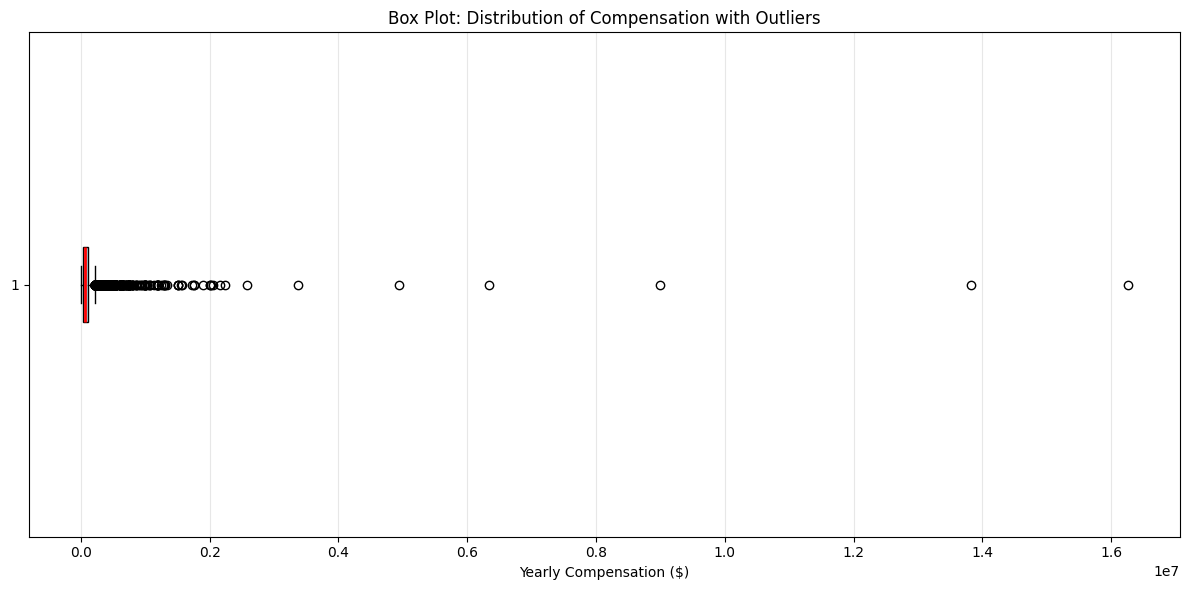

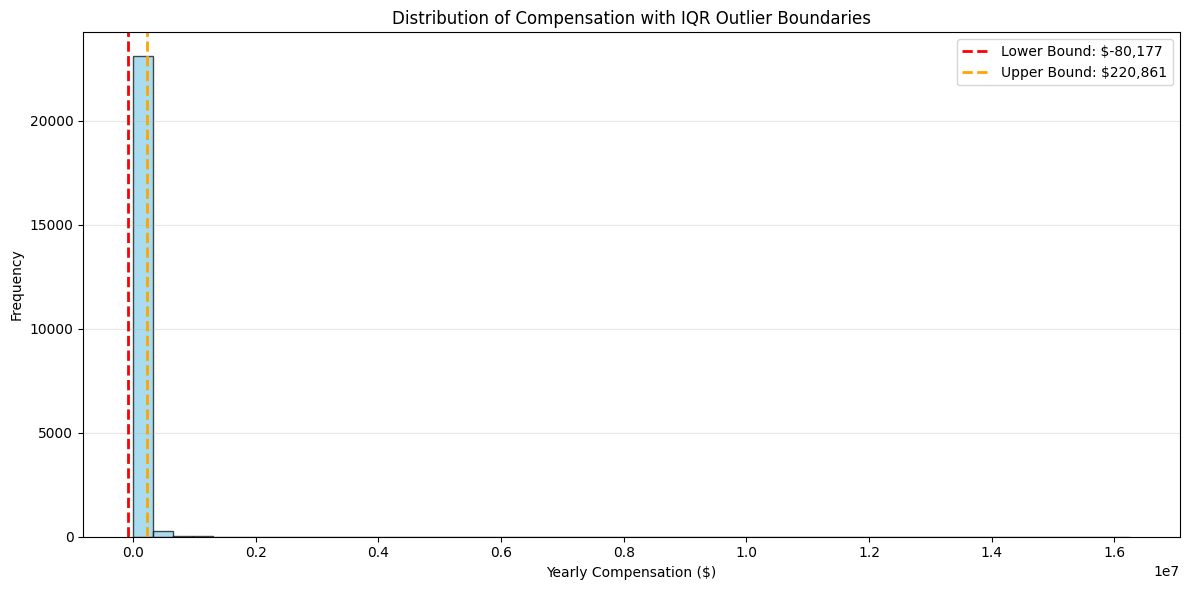

In [5]:
# Identify outliers using the IQR method
if 'ConvertedCompYearly' in df.columns:
    comp_data = df['ConvertedCompYearly'].dropna()
    
    # Calculate the Interquartile Range (IQR)
    Q1 = comp_data.quantile(0.25)
    Q3 = comp_data.quantile(0.75)
    IQR = Q3 - Q1
    
    print("IQR Method for Outlier Detection:")
    print("="*60)
    print(f"Q1 (25th percentile): ${Q1:,.2f}")
    print(f"Q3 (75th percentile): ${Q3:,.2f}")
    print(f"IQR: ${IQR:,.2f}")
    
    # Determine the upper and lower bounds for outliers
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    print(f"\nLower Bound: ${lower_bound:,.2f}")
    print(f"Upper Bound: ${upper_bound:,.2f}")
    
    # Identify outliers
    outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
    
    print(f"\nNumber of outliers detected: {len(outliers)}")
    print(f"Percentage of dataset: {(len(outliers) / len(df) * 100):.2f}%")
    
    print("\n" + "="*60 + "\n")
    
    # Count and visualize outliers using a box plot
    plt.figure(figsize=(12, 6))
    plt.boxplot(comp_data, vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='black'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'),
                medianprops=dict(color='red', linewidth=2))
    plt.title('Box Plot: Distribution of Compensation with Outliers')
    plt.xlabel('Yearly Compensation ($)')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Additional visualization: Histogram with outlier boundaries
    plt.figure(figsize=(12, 6))
    plt.hist(comp_data, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(lower_bound, color='red', linestyle='--', linewidth=2, label=f'Lower Bound: ${lower_bound:,.0f}')
    plt.axvline(upper_bound, color='orange', linestyle='--', linewidth=2, label=f'Upper Bound: ${upper_bound:,.0f}')
    plt.title('Distribution of Compensation with IQR Outlier Boundaries')
    plt.xlabel('Yearly Compensation ($)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


Dataset After Removing Outliers:
Original dataset size: 65437 rows
New dataset size: 22457 rows
Rows removed: 42980
Percentage removed: 65.68%


New DataFrame Statistics:
count     22457.000000
mean      71347.201897
std       51271.396445
min           1.000000
25%       32000.000000
50%       63694.000000
75%      101281.000000
max      220207.000000
Name: ConvertedCompYearly, dtype: float64


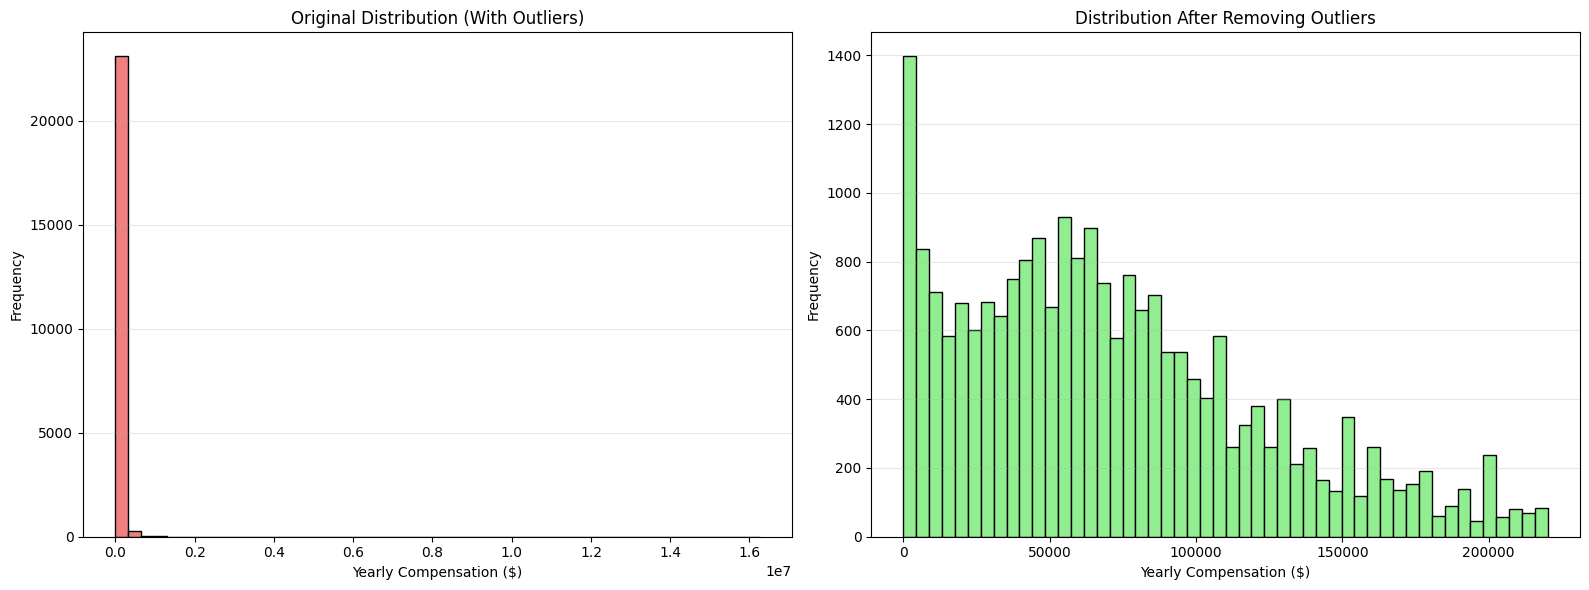

In [6]:
# Remove outliers from the dataset
if 'ConvertedCompYearly' in df.columns:
    # Calculate IQR bounds (using previous calculations)
    comp_data = df['ConvertedCompYearly'].dropna()
    Q1 = comp_data.quantile(0.25)
    Q3 = comp_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    # Create a new DataFrame excluding rows with outliers in ConvertedCompYearly
    df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & 
                        (df['ConvertedCompYearly'] <= upper_bound)].copy()
    
    print("Dataset After Removing Outliers:")
    print("="*60)
    print(f"Original dataset size: {len(df)} rows")
    print(f"New dataset size: {len(df_no_outliers)} rows")
    print(f"Rows removed: {len(df) - len(df_no_outliers)}")
    print(f"Percentage removed: {((len(df) - len(df_no_outliers)) / len(df) * 100):.2f}%")
    
    print("\n" + "="*60 + "\n")
    
    # Validate the size of the new DataFrame
    print("New DataFrame Statistics:")
    print(df_no_outliers['ConvertedCompYearly'].describe())
    
    # Compare distributions
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Original distribution
    axes[0].hist(df['ConvertedCompYearly'].dropna(), bins=50, color='lightcoral', edgecolor='black')
    axes[0].set_title('Original Distribution (With Outliers)')
    axes[0].set_xlabel('Yearly Compensation ($)')
    axes[0].set_ylabel('Frequency')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Distribution without outliers
    axes[1].hist(df_no_outliers['ConvertedCompYearly'].dropna(), bins=50, color='lightgreen', edgecolor='black')
    axes[1].set_title('Distribution After Removing Outliers')
    axes[1].set_xlabel('Yearly Compensation ($)')
    axes[1].set_ylabel('Frequency')
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


Age Mapping:
{'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 29.5, '35-44 years old': 39.5, '45-54 years old': 49.5, '55-64 years old': 59.5, '65 years or older': 65}


Correlation between Age and Other Numeric Variables:
Age_Numeric            1.000000
WorkExp                0.843977
ConvertedCompYearly    0.371556
JobSat                 0.066822
CompTotal             -0.021446
JobSatPoints_1        -0.039079
ResponseId            -0.040949
JobSatPoints_8        -0.051692
JobSatPoints_6        -0.051797
JobSatPoints_4        -0.070037
JobSatPoints_7        -0.083887
JobSatPoints_9        -0.084418
JobSatPoints_5        -0.096967
JobSatPoints_11       -0.106773
JobSatPoints_10       -0.111993
Name: Age_Numeric, dtype: float64




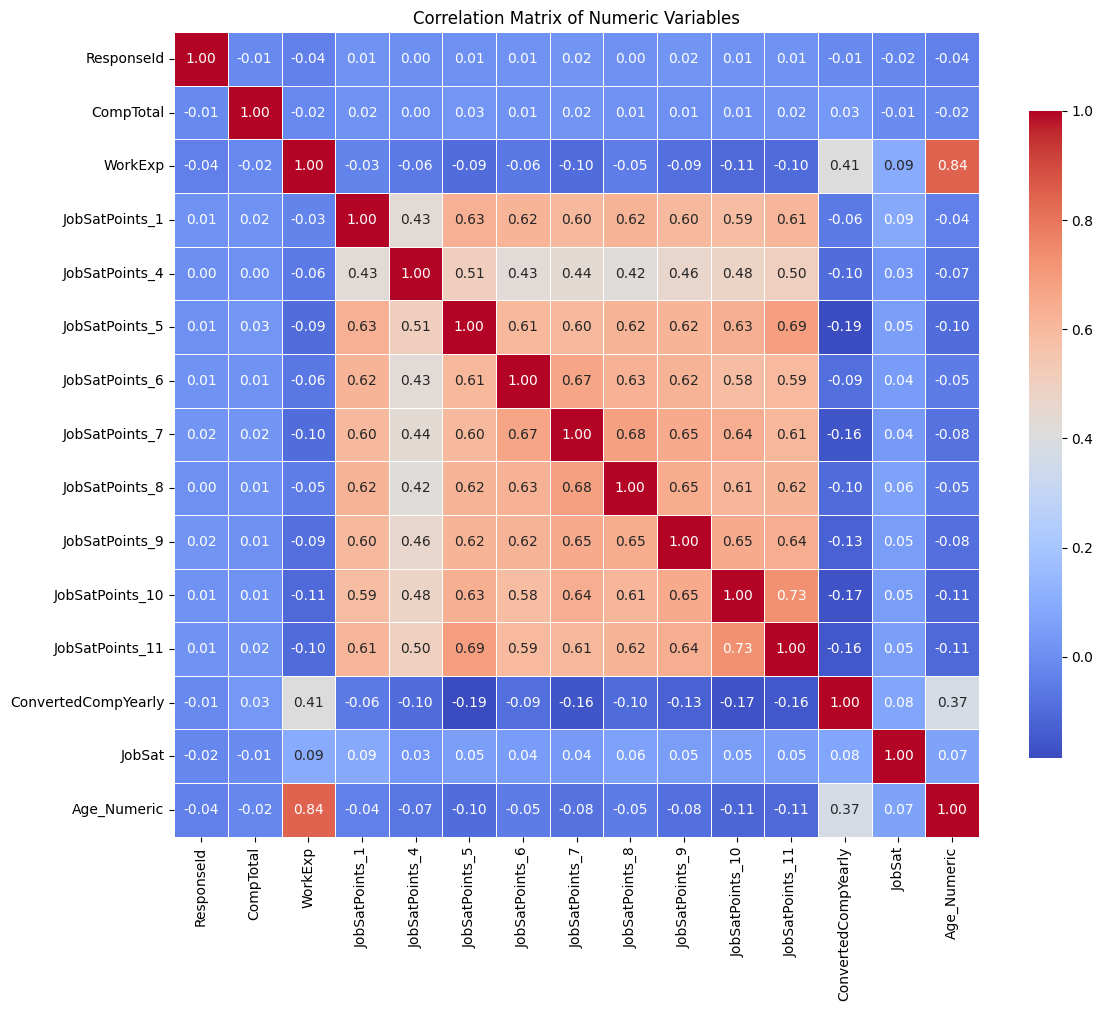

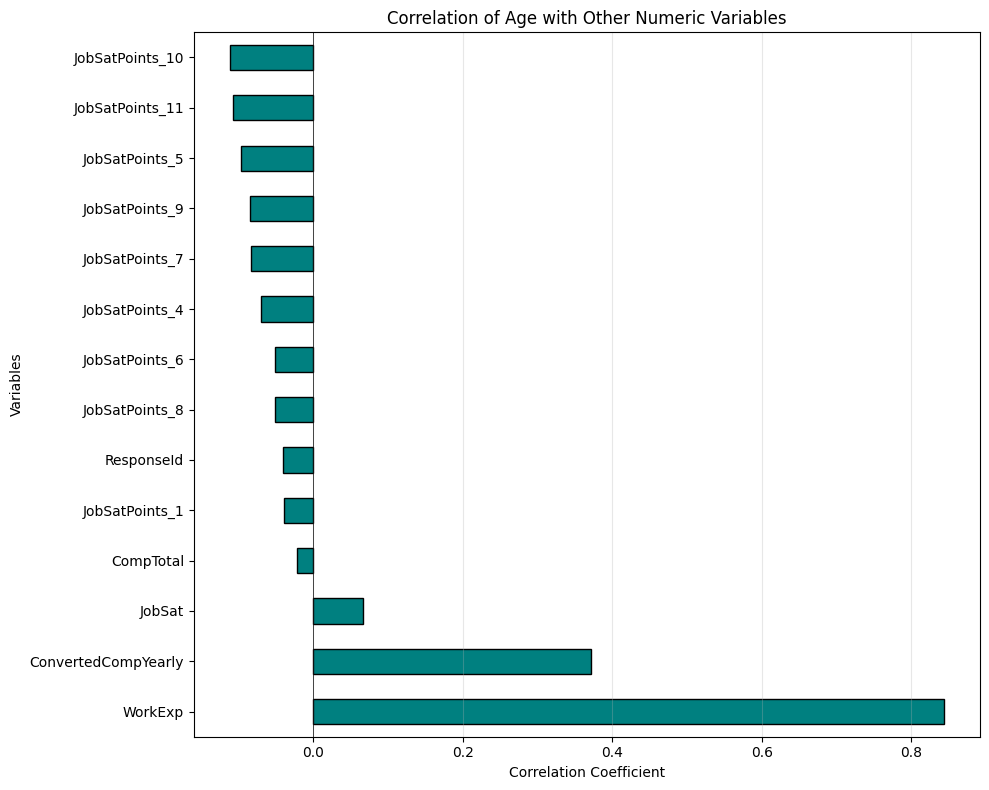

In [7]:
# Analyze the correlation between Age (transformed) and other numerical columns
if 'Age' in df_no_outliers.columns:
    # Map the Age column to approximate numeric values
    age_mapping = {
        'Under 18 years old': 17,
        '18-24 years old': 21,
        '25-34 years old': 29.5,
        '35-44 years old': 39.5,
        '45-54 years old': 49.5,
        '55-64 years old': 59.5,
        '65 years or older': 65
    }
    
    df_no_outliers['Age_Numeric'] = df_no_outliers['Age'].map(age_mapping)
    
    print("Age Mapping:")
    print(age_mapping)
    
    print("\n" + "="*60 + "\n")
    
    # Select numeric columns for correlation analysis
    numeric_cols = df_no_outliers.select_dtypes(include=['int64', 'float64']).columns
    
    # Compute correlations between Age_Numeric and other numeric variables
    correlations = df_no_outliers[numeric_cols].corr()['Age_Numeric'].sort_values(ascending=False)
    
    print("Correlation between Age and Other Numeric Variables:")
    print(correlations)
    
    print("\n" + "="*60 + "\n")
    
    # Visualize the correlation matrix
    plt.figure(figsize=(12, 10))
    correlation_matrix = df_no_outliers[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Numeric Variables')
    plt.tight_layout()
    plt.show()
    
    # Focus on Age correlations
    plt.figure(figsize=(10, 8))
    correlations.drop('Age_Numeric').plot(kind='barh', color='teal', edgecolor='black')
    plt.title('Correlation of Age with Other Numeric Variables')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Variables')
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
